# Ford GoBike Share Analysis

## Introduction





## Data Wrangling

Below is the 

In [236]:
# import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

### Read master CSV

In [241]:
shrtwkday = CategoricalDtype(categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)

dtypes = {'duration_sec':pd.Int64Dtype(),'start_time':'str','end_time':'str','start_station_id':pd.Int64Dtype(),'start_station_name':'str',
          'start_station_latitude':'float','start_station_longitude':'float','end_station_id':pd.Int64Dtype(),
          'end_station_name':'str','end_station_latitude':'float','end_station_longitude':'float',
          'bike_id':'int','user_type':'str','start_date':'str','start_year':pd.Int64Dtype(),'start_month':pd.Int64Dtype(),
          'start_hour':pd.Int64Dtype(),'start_weekday':shrtwkday,'end_date':'str','end_year':pd.Int64Dtype(),
          'end_month':pd.Int64Dtype(),'end_hour':pd.Int64Dtype(),'end_weekday':shrtwkday}

parse_dates = ['start_time','end_time','start_date','end_date']

trip_df = pd.read_csv('./trip_master.csv.gz', encoding='utf-8', compression='gzip', dtype = dtypes, parse_dates=parse_dates)

In [242]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740302 entries, 0 to 4740301
Data columns (total 24 columns):
Unnamed: 0                 int64
duration_sec               Int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           Int64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             Int64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int32
user_type                  object
start_date                 datetime64[ns]
start_year                 Int64
start_month                Int64
start_hour                 Int64
start_weekday              category
end_date                   datetime64[ns]
end_year                   Int64
end_month                  Int64
end_hour                   Int64
end_weekday                category
dtypes: Int64(9), category(2), datetime64[

In [6]:
trip_df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,start_date,start_year,start_month,start_hour,start_weekday,end_date,end_year,end_month,end_hour,end_weekday
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,2017-12-31,2017,12,16,Sun,2018-01-01,2018,1,15,Mon
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,2017-12-31,2017,12,15,Sun,2018-01-01,2018,1,13,Mon
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,2017-12-31,2017,12,22,Sun,2018-01-01,2018,1,11,Mon
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,2017-12-31,2017,12,17,Sun,2018-01-01,2018,1,10,Mon
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,2017-12-31,2017,12,14,Sun,2018-01-01,2018,1,2,Mon


In [261]:
trip_df['bike_id'].sample(50)

652216       2597
3204759      6058
4147310     10063
3548055      1134
2817554      2628
1717033      3390
391479        273
1508788      1513
2755758      2979
2339233        71
784623       1362
3458765      2316
4301320      9839
3402195      1499
3685769      1090
375537       2969
2290382      5114
4701614     12365
4634881     11402
275599        439
2462633      4361
3205008      5324
2017886      1603
320058       1727
1072421      3516
509835        215
3300760      2657
475462        194
4629918     12839
3146618      5484
3274366      3074
102602        200
3225423      5914
1283681      1342
2022351        47
3781392      3105
2240419      1613
1365179       180
3819655    593917
3730649      1399
196566       2356
2158490       457
3452803      2760
1213077       228
292460        238
796895       2005
3665098      9232
3922202      2581
2974994      4026
4172576      9740
Name: bike_id, dtype: int32

### Sample Data

In [243]:
tripsamp_df = trip_df.sample(frac=.1)

In [244]:
tripsamp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474030 entries, 3368060 to 555057
Data columns (total 24 columns):
Unnamed: 0                 474030 non-null int64
duration_sec               474030 non-null Int64
start_time                 474030 non-null datetime64[ns]
end_time                   474030 non-null datetime64[ns]
start_station_id           466783 non-null Int64
start_station_name         466836 non-null object
start_station_latitude     474030 non-null float64
start_station_longitude    474030 non-null float64
end_station_id             466678 non-null Int64
end_station_name           466734 non-null object
end_station_latitude       474030 non-null float64
end_station_longitude      474030 non-null float64
bike_id                    474030 non-null int32
user_type                  474030 non-null object
start_date                 474030 non-null datetime64[ns]
start_year                 474030 non-null Int64
start_month                474030 non-null Int64
start_hour  

## Exploratory Data Analysis

### Univariate Exploration

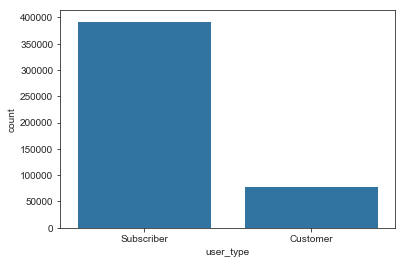

In [245]:
base_color = sb.color_palette()[0]
sub_order = tripsamp_df['user_type'].value_counts().index

sb.countplot(data = tripsamp_df, x = 'user_type', color = base_color,
            order = sub_order);

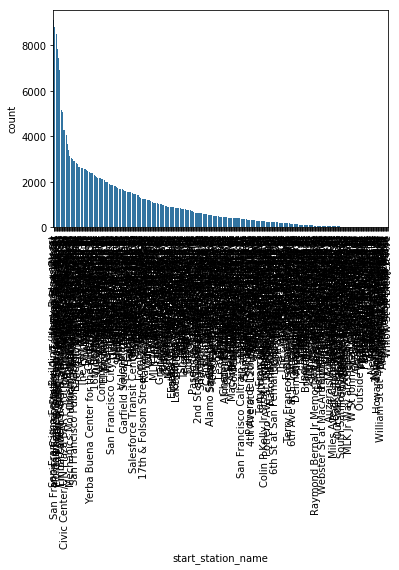

In [10]:
start_station_order = tripsamp_df['start_station_name'].value_counts().index

sb.countplot(data = tripsamp_df, x = 'start_station_name', color = base_color,
            order = start_station_order);

plt.xticks(rotation = 90);


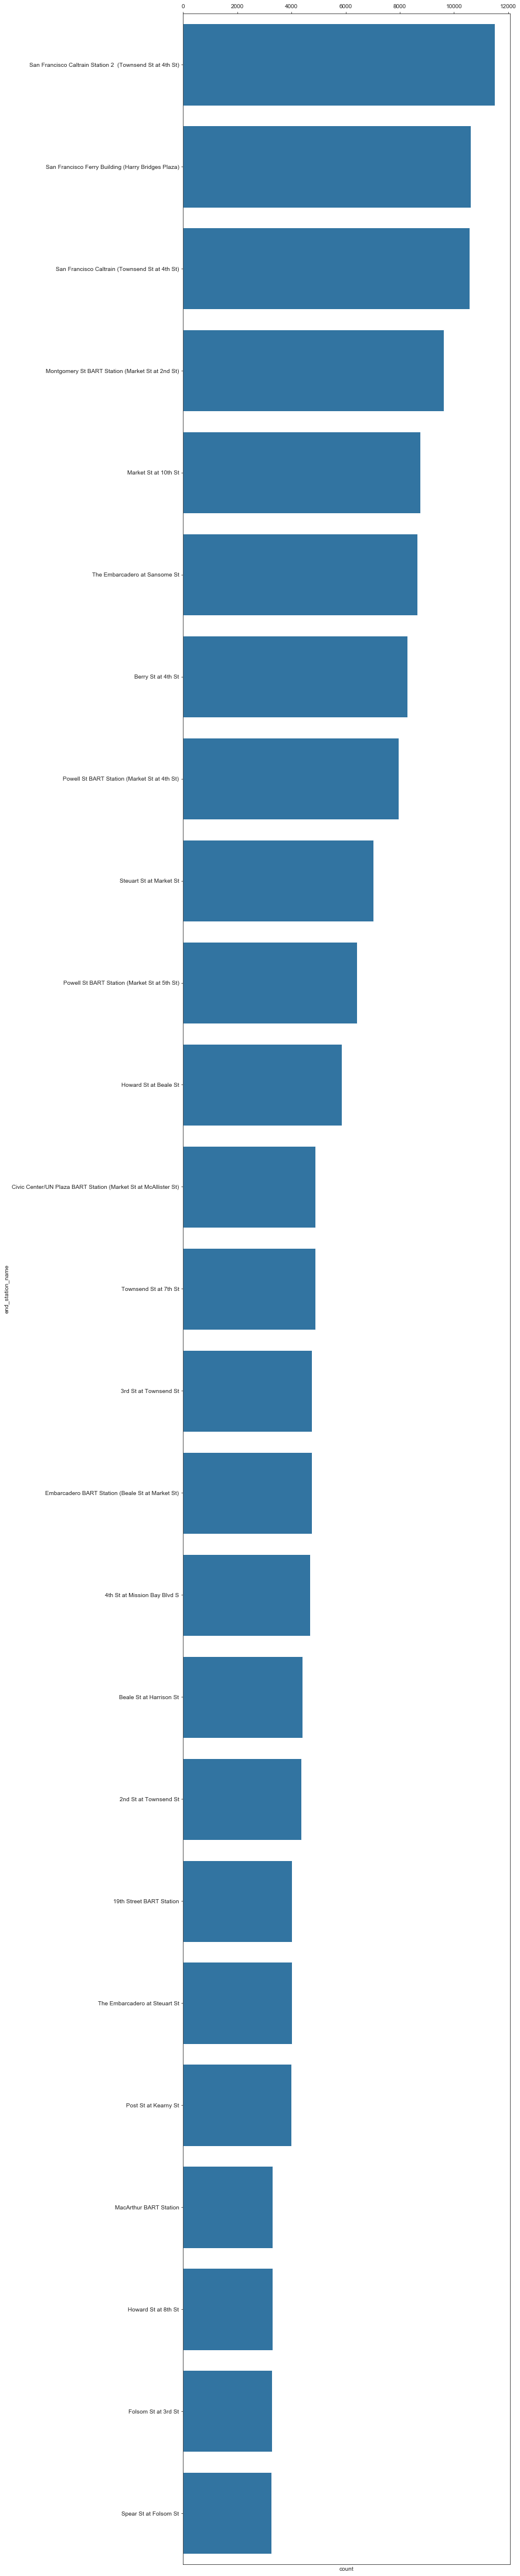

In [297]:


plt.figure(figsize = [10, 80])

#fig, ax = plt.subplots();


end_station_order = tripsamp_df['end_station_name'].value_counts().index

sb.countplot(data = tripsamp_df, y = 'end_station_name', color = base_color,
            order = end_station_order[:25]);

plt.xticks(rotation = 90);
plt.gca().xaxis.set_ticks_position('top')

plt.show()

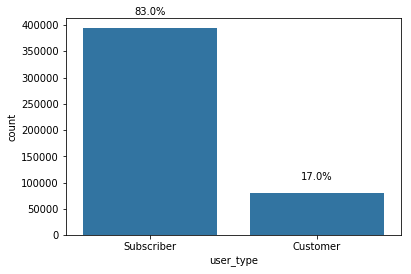

In [13]:
# Shape[0] is the number of rows; Shape[1] is the number of columns
n_trips = tripsamp_df.shape[0]

user_counts = tripsamp_df['user_type'].value_counts()
user_type_order = tripsamp_df['user_type'].value_counts().index

max_user_count = user_counts[0]
max_prop = max_user_count / n_trips
tick_props = np.arange(0, max_prop+0.2, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


sb.countplot(data = tripsamp_df, x = 'user_type', color = base_color,
            order = user_type_order);
#plt.yticks(tick_props * n_trips, tick_names)
#plt.ylabel('proportion');

for i in range(user_counts.shape[0]):
    count = user_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_trips)
    plt.text(i, count+25000, pct_string, ha = 'center');


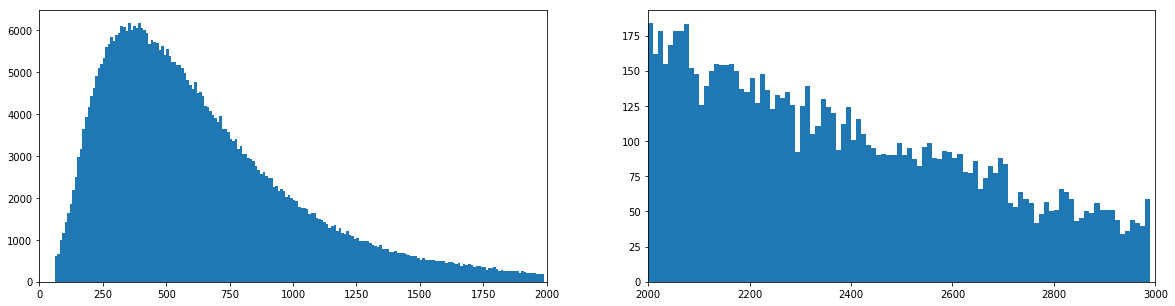

In [14]:
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
bins = np.arange(0,2000,10)
plt.hist(data = tripsamp_df, x = "duration_sec", bins = bins);
plt.xlim((0,2000))

plt.subplot(1,2,2)
bins = np.arange(2000,3000,10)
plt.hist(data = tripsamp_df, x = "duration_sec", bins = bins);
plt.xlim((2000,3000));

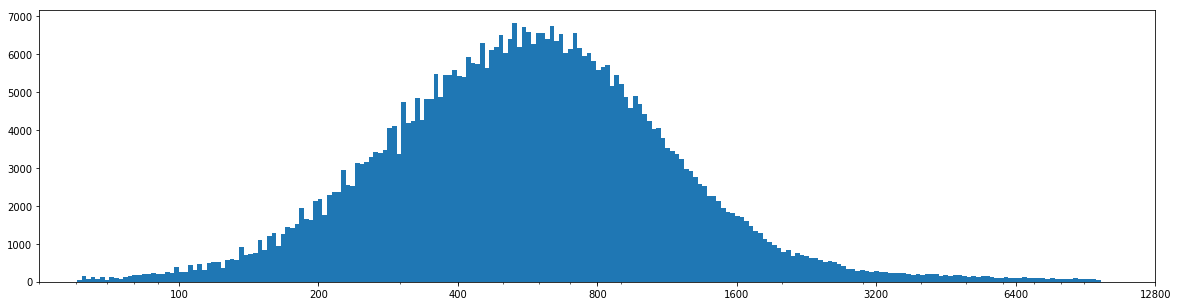

In [15]:
plt.figure(figsize = [20, 5])

bins = 10 ** np.arange(1,4,.01)
ticks = [100, 200, 400, 800, 1600, 3200, 6400, 12800]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = tripsamp_df, x = "duration_sec", bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim(50, 12800);


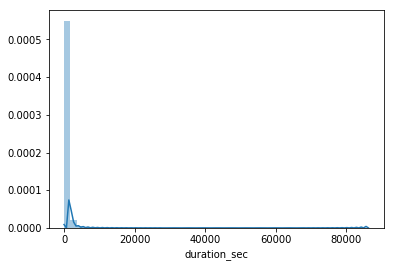

In [16]:
sb.distplot(tripsamp_df['duration_sec']);

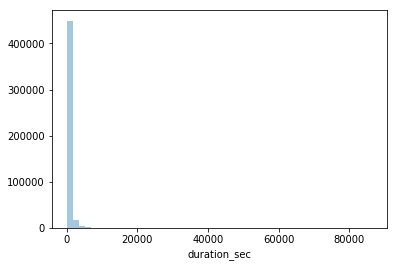

In [17]:
sb.distplot(tripsamp_df['duration_sec'], kde = False);

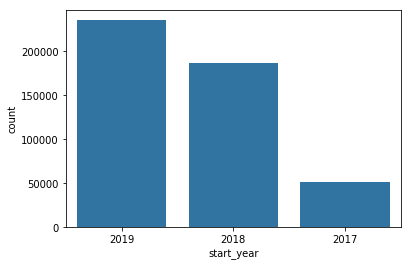

In [18]:
base_color = sb.color_palette()[0]
year_order = tripsamp_df['start_year'].value_counts().index

sb.countplot(data = tripsamp_df, x = 'start_year', color = base_color,
            order = year_order);

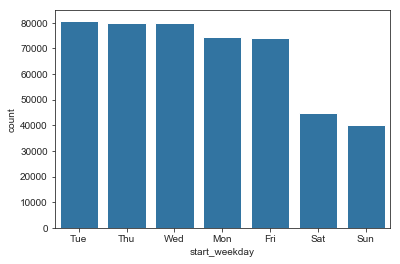

In [249]:
base_color = sb.color_palette()[0]
weekday_order = tripsamp_df['start_weekday'].value_counts().index

sb.countplot(data = tripsamp_df, x = 'start_weekday', color = base_color,
            order = weekday_order);

NameError: name 'df' is not defined

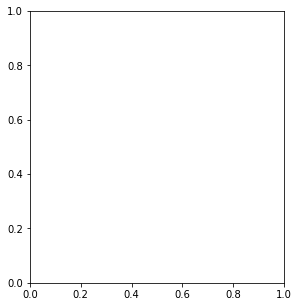

In [20]:
# Subplots

plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+4, 4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

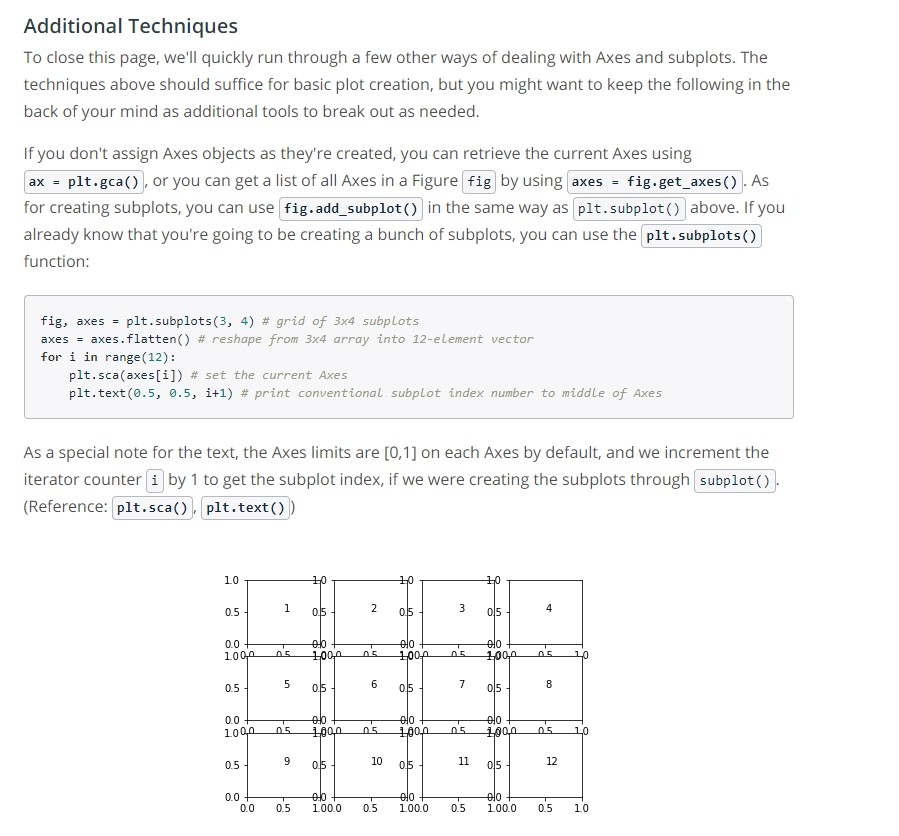

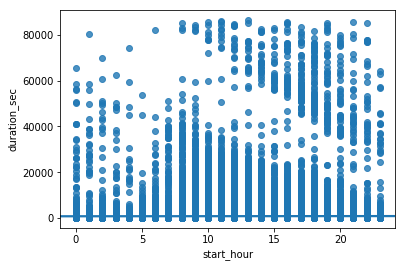

In [21]:
sb.regplot(data = tripsamp_df, x = 'start_hour', y = 'duration_sec');

In [1]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots
plt.scatter(data = tripsamp_df, x = 'start_hour', y = tripsamp_df['duration_sec'] / 3600);
plt.plot([24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], color='red');
plt.plot([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9], color='red');

NameError: name 'plt' is not defined

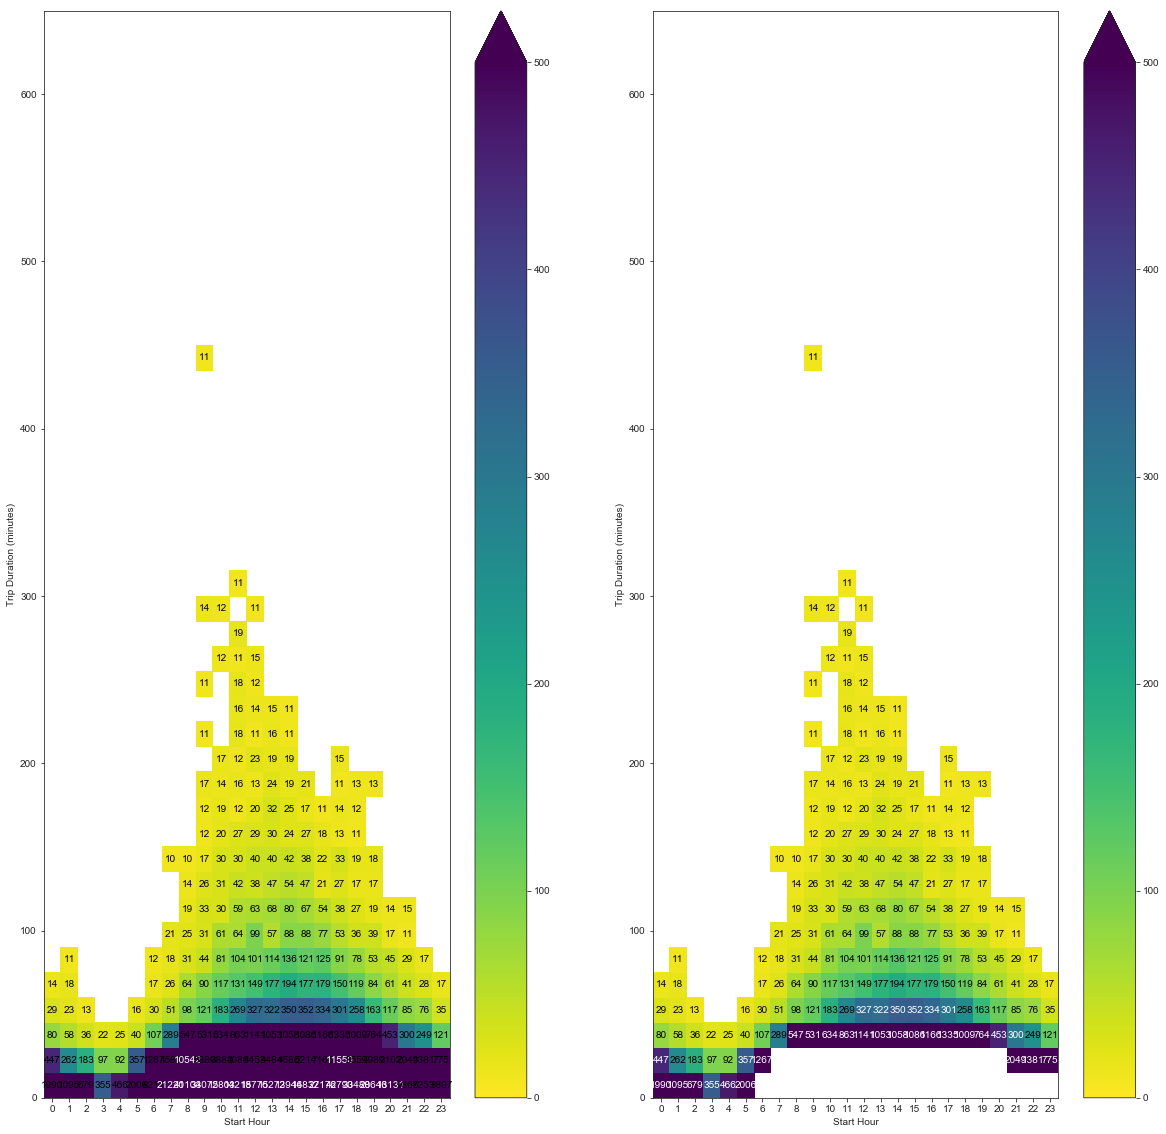

In [220]:
bins_x = np.arange(0, 25, 1)
bins_y = np.arange(0, 600, 15)

fig = plt.figure(figsize = [20, 20]) # larger figure size for subplots

fig.subplots(1,2)

plt.subplot(1,2,1)

h2d = plt.hist2d(data = tripsamp_df, x = tripsamp_df['start_hour'], y = tripsamp_df['duration_sec'] / 60, cmin = 10,
          cmap = 'viridis_r', bins = [bins_x - 0.5, bins_y],  vmin=0, vmax=500);

plt.colorbar(extend='max', spacing='uniform')

axes = plt.gca()
axes.set_ylim([0,650])
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (minutes)')
ax.set_yticks(bins_y)
ax.set_yticklabels = (["{} ({:.2} hours)".format(y, y / 60) for y in bins_y])
plt.xticks(np.arange(0,24,1))

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 10000: # increase visibility on darkest cells
            plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
            
            
plt.subplot(1,2,2)

h2d = plt.hist2d(data = tripsamp_df, x = tripsamp_df['start_hour'], y = tripsamp_df['duration_sec'] / 60, cmin = 10,
          cmax = 2100, cmap = 'viridis_r', bins = [bins_x - 0.5, bins_y],  vmin=0, vmax=500);

plt.colorbar(extend='max', spacing='uniform')

axes = plt.gca()
axes.set_ylim([0,650])
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (minutes)')
ax.set_yticks(bins_y)
ax.set_yticklabels = (["{} ({:.2} hours)".format(y, y / 60) for y in bins_y])
plt.xticks(np.arange(0,24,1))

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 300: # increase visibility on darkest cells
            plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

TypeError: heatplot() got an unexpected keyword argument 'ylim'

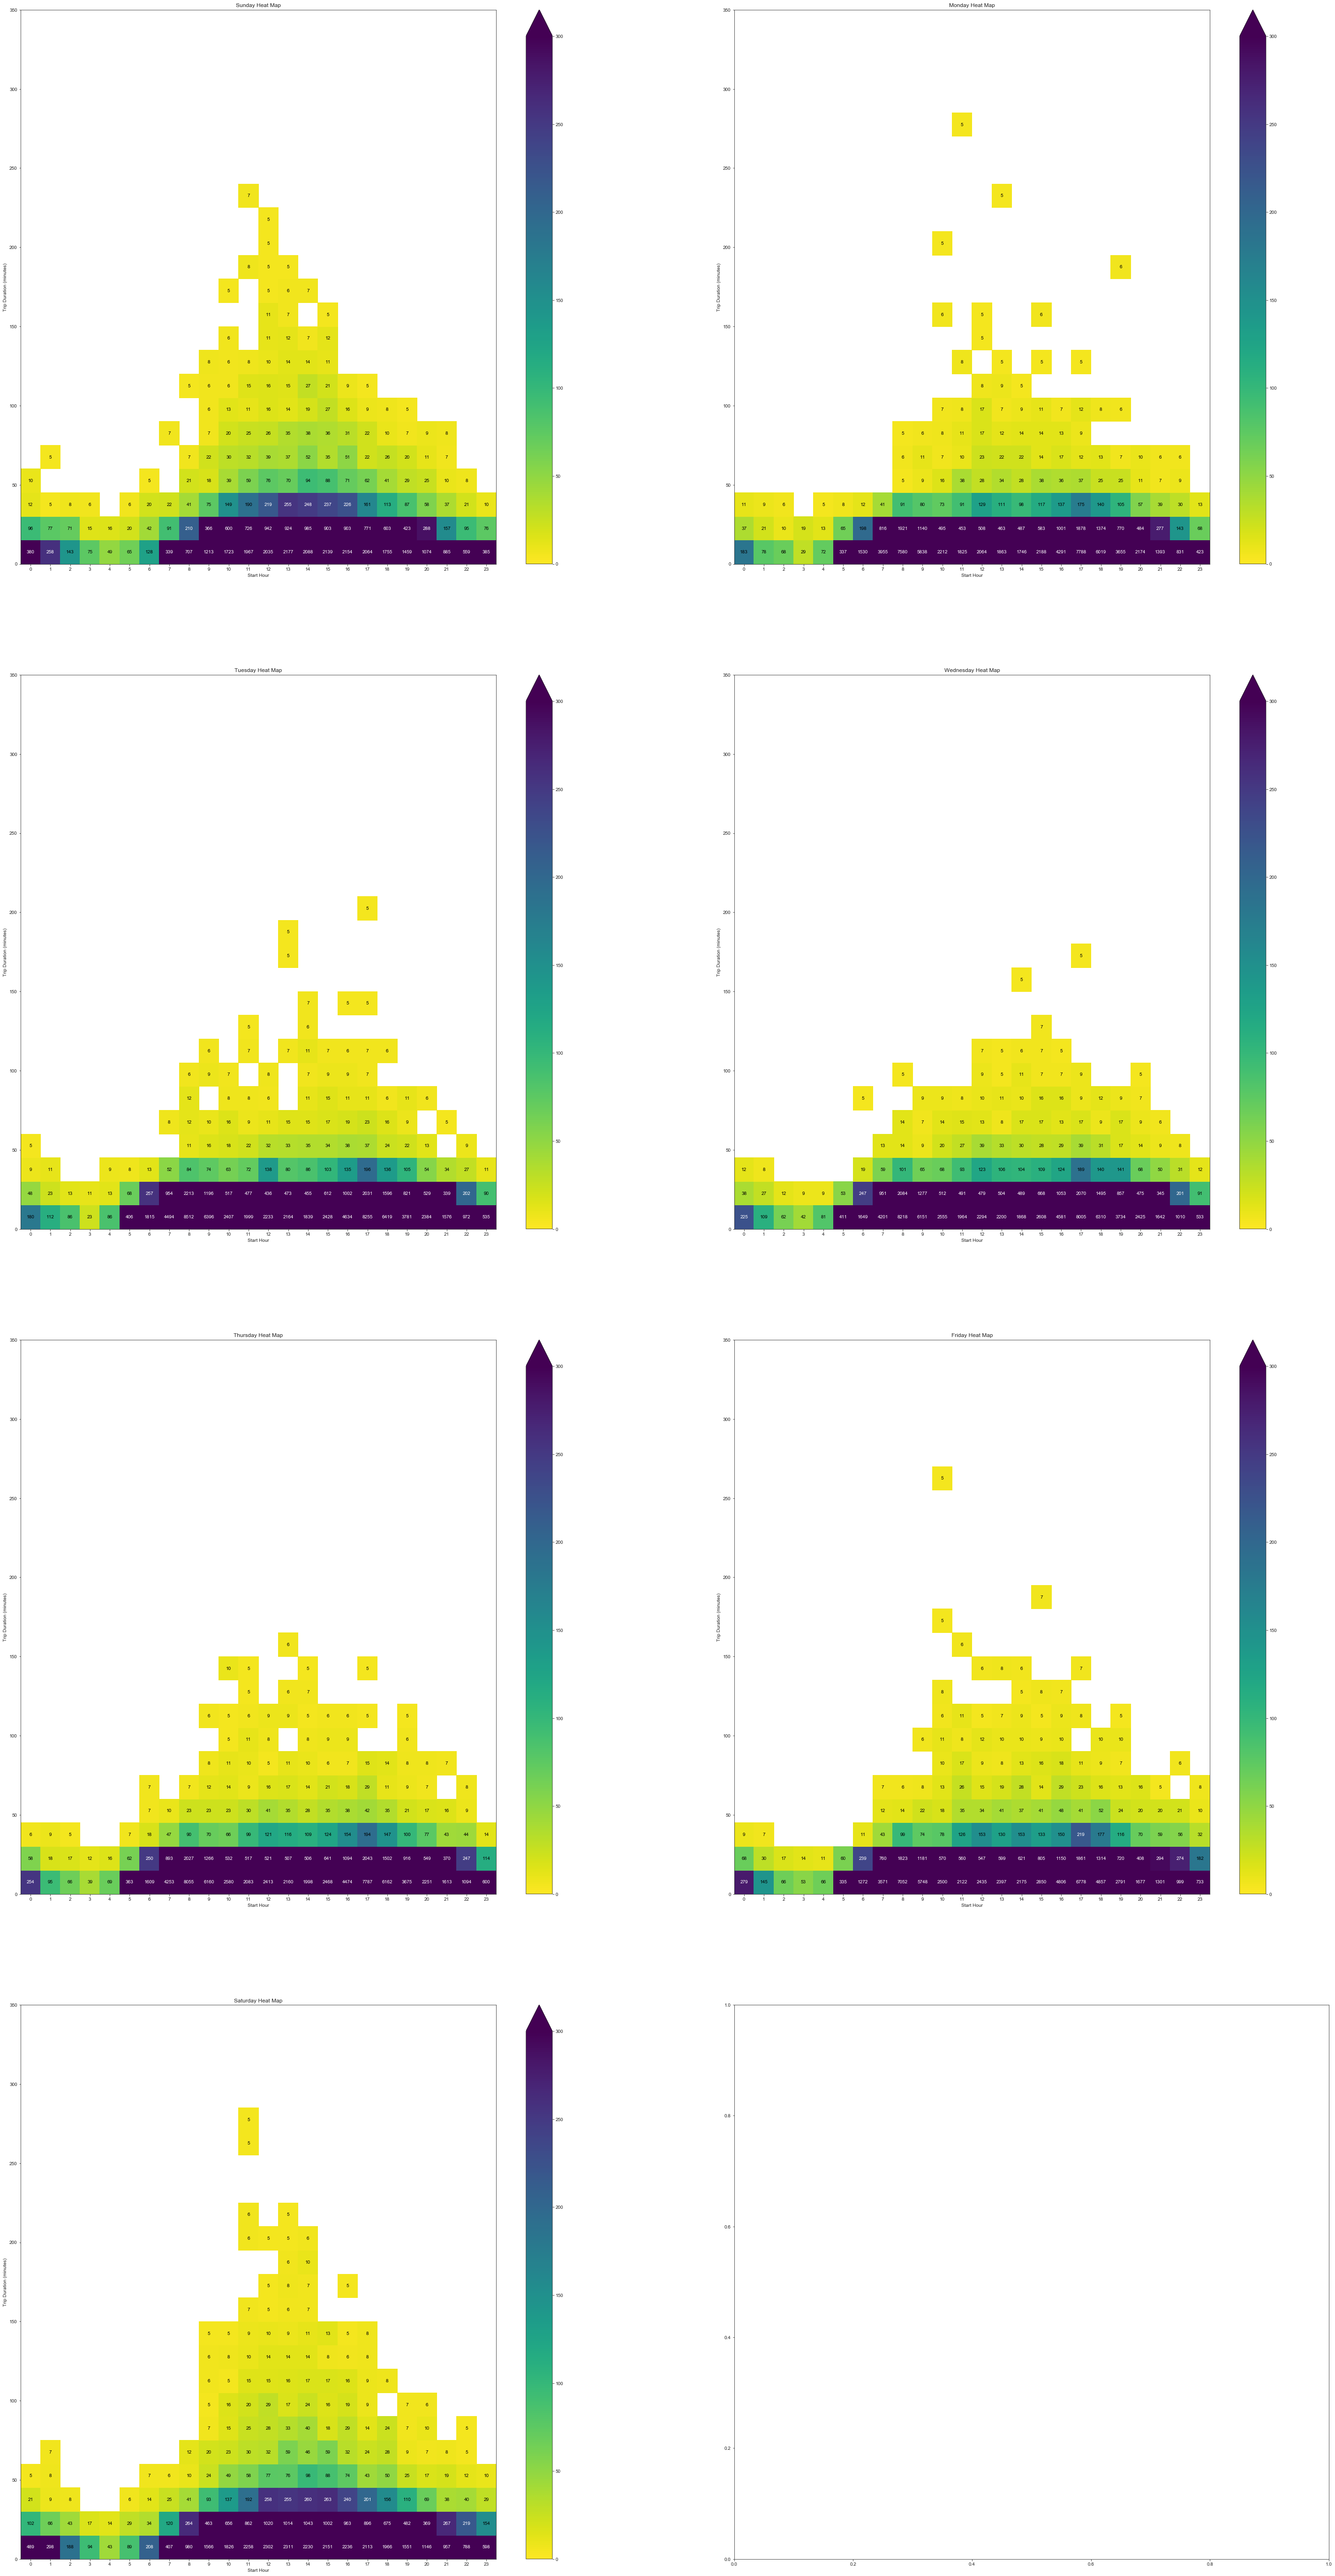

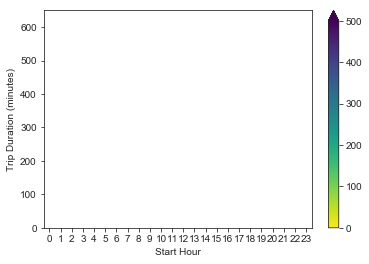

In [198]:

test_df = tripsamp_df[tripsamp_df.start_weekday == 'Monday']

h2d = plt.hist2d(data = test_df, x = test_df['start_hour'], y = test_df['duration_sec'] / 60, cmin = 10,
          cmax = 2100, cmap = 'viridis_r', bins = [bins_x - 0.5, bins_y],  vmin=0, vmax=500);

plt.colorbar(extend='max', spacing='uniform')

axes = plt.gca()
axes.set_ylim([0,650])
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (minutes)')
ax.set_yticks(bins_y)
ax.set_yticklabels = (["{} ({:.2} hours)".format(y, y / 60) for y in bins_y])
plt.xticks(np.arange(0,24,1))

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 300: # increase visibility on darkest cells
            plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

In [199]:

trip_df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,start_date,start_year,start_month,start_hour,start_weekday,end_date,end_year,end_month,end_hour,end_weekday
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,...,2017-12-31,2017,12,16,Sun,2018-01-01,2018,1,15,Mon
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,...,2017-12-31,2017,12,15,Sun,2018-01-01,2018,1,13,Mon
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,...,2017-12-31,2017,12,22,Sun,2018-01-01,2018,1,11,Mon
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),...,2017-12-31,2017,12,17,Sun,2018-01-01,2018,1,10,Mon
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,...,2017-12-31,2017,12,14,Sun,2018-01-01,2018,1,2,Mon


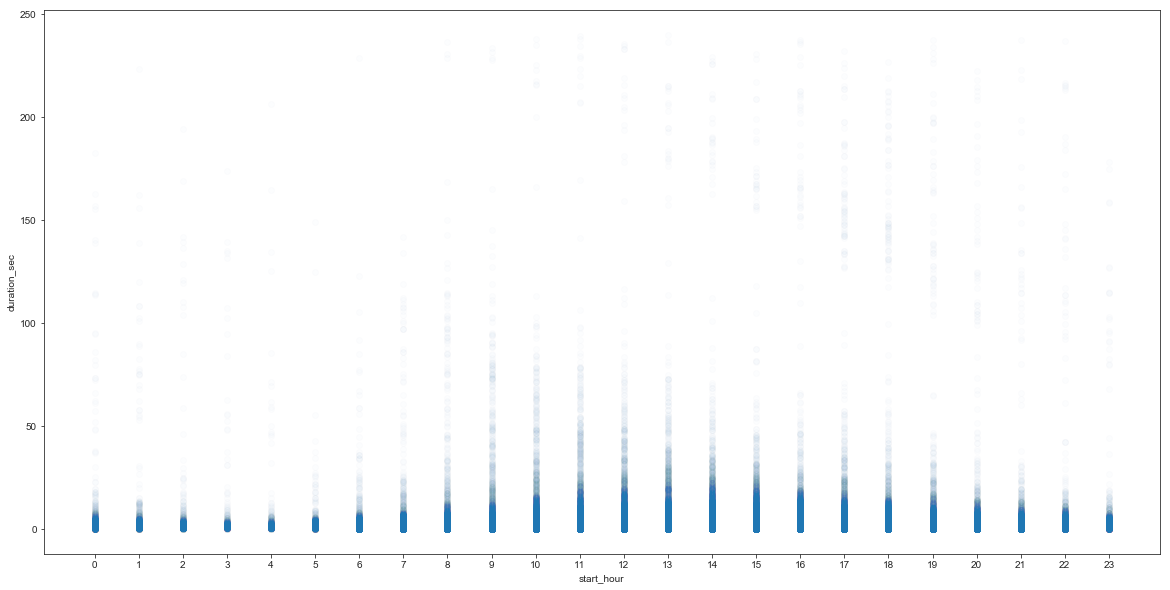

In [169]:
plt.figure(figsize = [20, 10]) # larger figure size for subplots


sb.set_style('whitegrid')
sb.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 1})

sb.regplot(data = tripsamp_df, x = 'start_hour', y = tripsamp_df['duration_sec'] / 360, fit_reg = False,
           x_jitter = 0.0, y_jitter = 0.1, scatter_kws = {'alpha' : 1/100})

plt.xticks(np.arange(0,24,1));

## Violin Plot

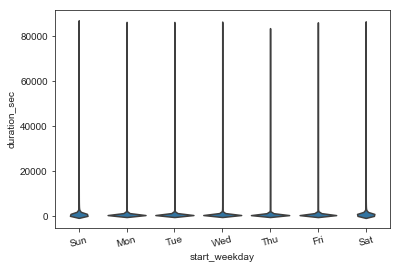

In [255]:
# Inner = None
base_color = sb.color_palette()[0]
sb.violinplot(data = tripsamp_df, x = 'start_weekday', y = tripsamp_df['duration_sec'].astype(np.float),
             color = base_color, inner = None)
plt.xticks(rotation = 15);

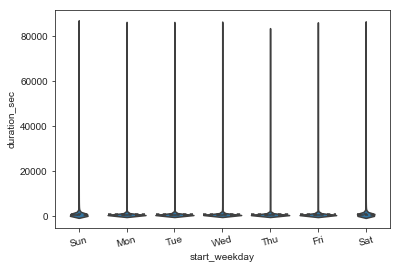

In [259]:
# Inner = Quartile
base_color = sb.color_palette()[0]
sb.violinplot(data = tripsamp_df, x = 'start_weekday', y = tripsamp_df['duration_sec'].astype(np.float),
             color = base_color, inner = 'quartile')
plt.xticks(rotation = 15);

## Box Plot

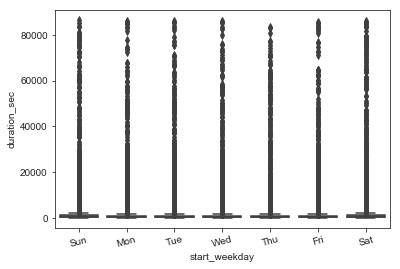

In [257]:
base_color = sb.color_palette()[0]
sb.boxplot(data = tripsamp_df, x = 'start_weekday', y = tripsamp_df['duration_sec'].astype(np.float),
             color = base_color) #, inner = None)
plt.xticks(rotation = 15);

In [ ]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');
ct_counts = tripsamp_df.groupby(['start_station_name','end_station_name']).size()
ct_counts..reset_index(name='count')
ct_counts.pivot(index = vclass', columns = trans-type, values=count)

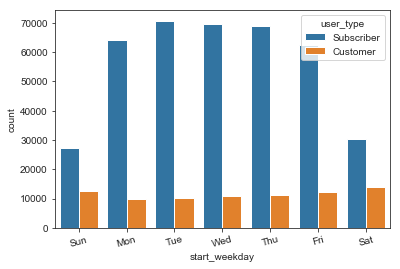

In [239]:
sb.countplot(data = tripsamp_df, x = 'start_weekday', hue = 'user_type')
plt.xticks(rotation = 15);

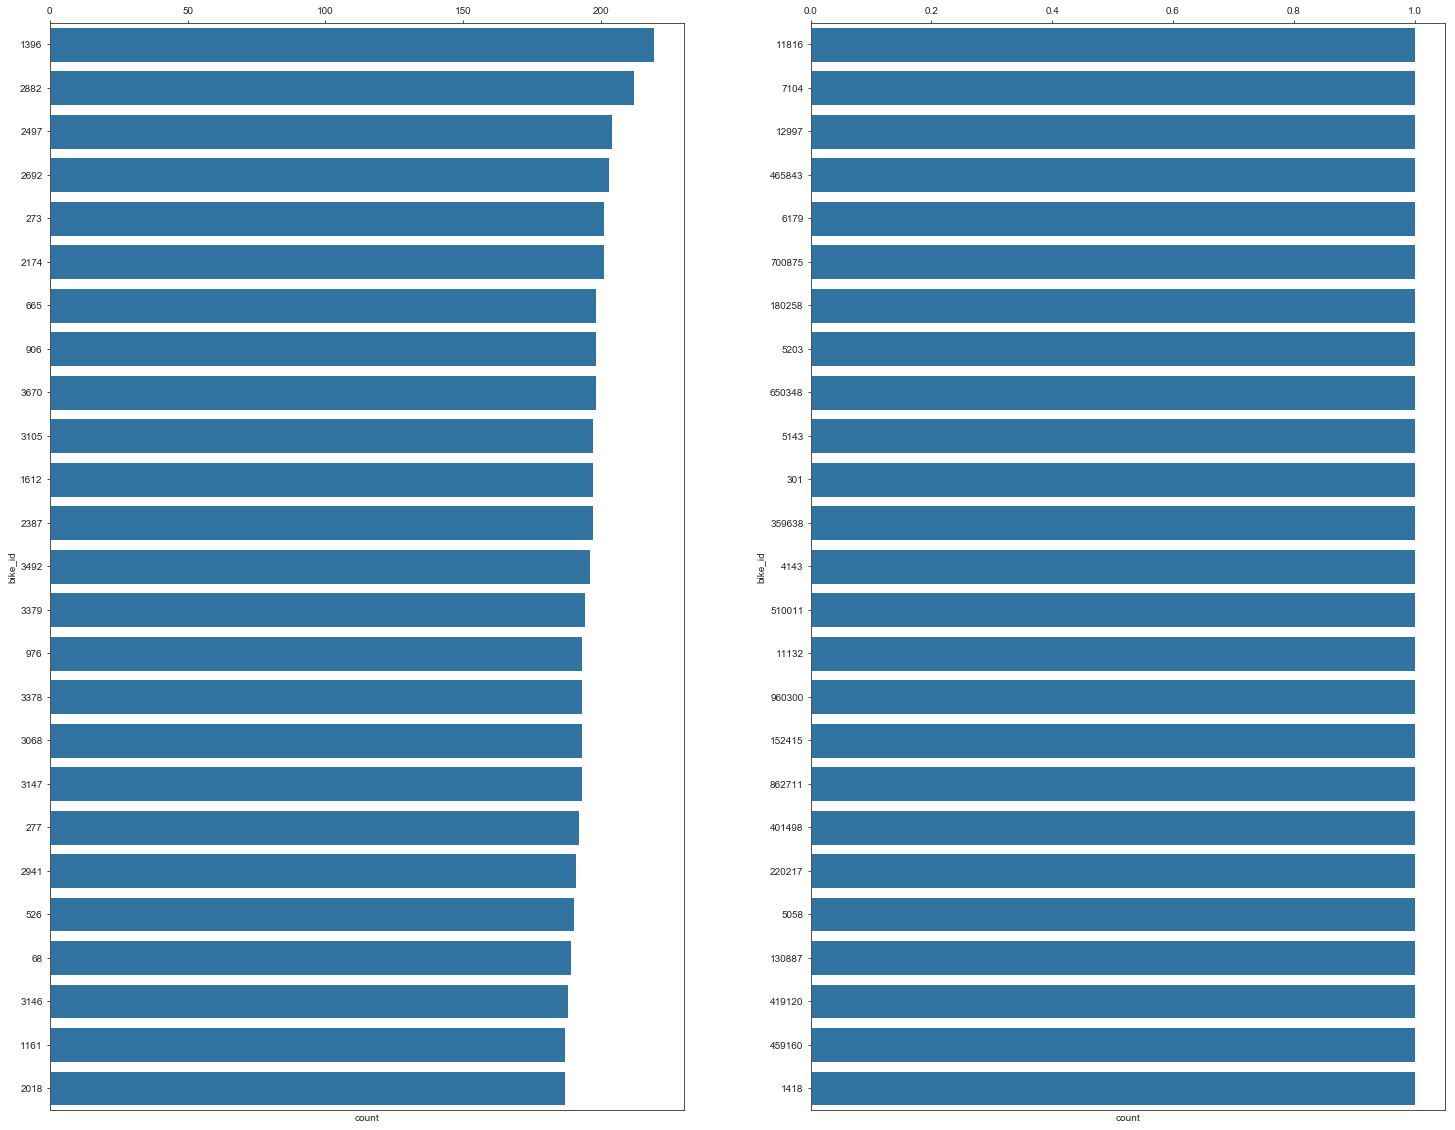

In [278]:


#fig, ax = plt.subplots();

fig = plt.figure(figsize = [25, 20])

fig.subplots(1,2)

bike_id_order = tripsamp_df['bike_id'].value_counts().index

plt.subplot(1,2,1)
sb.countplot(data = tripsamp_df, y = 'bike_id', color = base_color,
            order = bike_id_order[:25]);

plt.xticks(rotation = 90);
plt.gca().xaxis.set_ticks_position('top')

plt.subplot(1,2,2)
sb.countplot(data = tripsamp_df, y = 'bike_id', color = base_color,
            order = bike_id_order[len(bike_id_order)-25:]);

plt.xticks(rotation = 90);
plt.gca().xaxis.set_ticks_position('top')

plt.show()

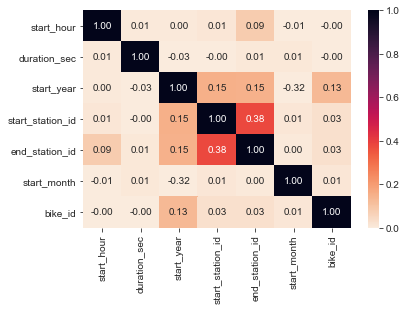

In [296]:
trip_stats = ['start_hour','duration_sec','start_year','start_station_id','end_station_id','start_month','bike_id']
sb.heatmap(tripsamp_df[trip_stats].corr(), cmap = 'rocket_r', annot=True, fmt = '.2f', vmin=0);


In [285]:

def heatplot(data, title, ylim = 300, cmin = 5,cmax = 10000,vmax = 300,bins_x = np.arange(0, 25, 1),bins_y = np.arange(0, 600, 15),colsplit = 200):
    h2d = plt.hist2d(data = data, x = data['start_hour'], y = data['duration_sec'] / 60, cmin = cmin,
              cmax = cmax, cmap = 'viridis_r', bins = [bins_x - 0.5, bins_y],  vmin=0, vmax=vmax);

    plt.colorbar(extend='max', spacing='uniform')

    axes = plt.gca()
    axes.set_ylim([0,ylim])
    plt.xlabel('Start Hour')
    plt.ylabel('Trip Duration (minutes)')
    axes.set_yticks(bins_y)
    axes.set_yticklabels = (["{} ({:.2} hours)".format(y, y / 60) for y in bins_y])
    plt.xticks(np.arange(0,24,1))
    plt.title(title)

    counts = h2d[0]

    # loop through the cell counts and add text annotations for each
    for i in range(counts.shape[0]):
        for j in range(counts.shape[1]):
            c = counts[i,j]
            if c >= colsplit: # increase visibility on darkest cells
                plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                         ha = 'center', va = 'center', color = 'white')
            elif c > 0:
                plt.text(bins_x[i], bins_y[j]+7.5, int(c),
                         ha = 'center', va = 'center', color = 'black')
    return()

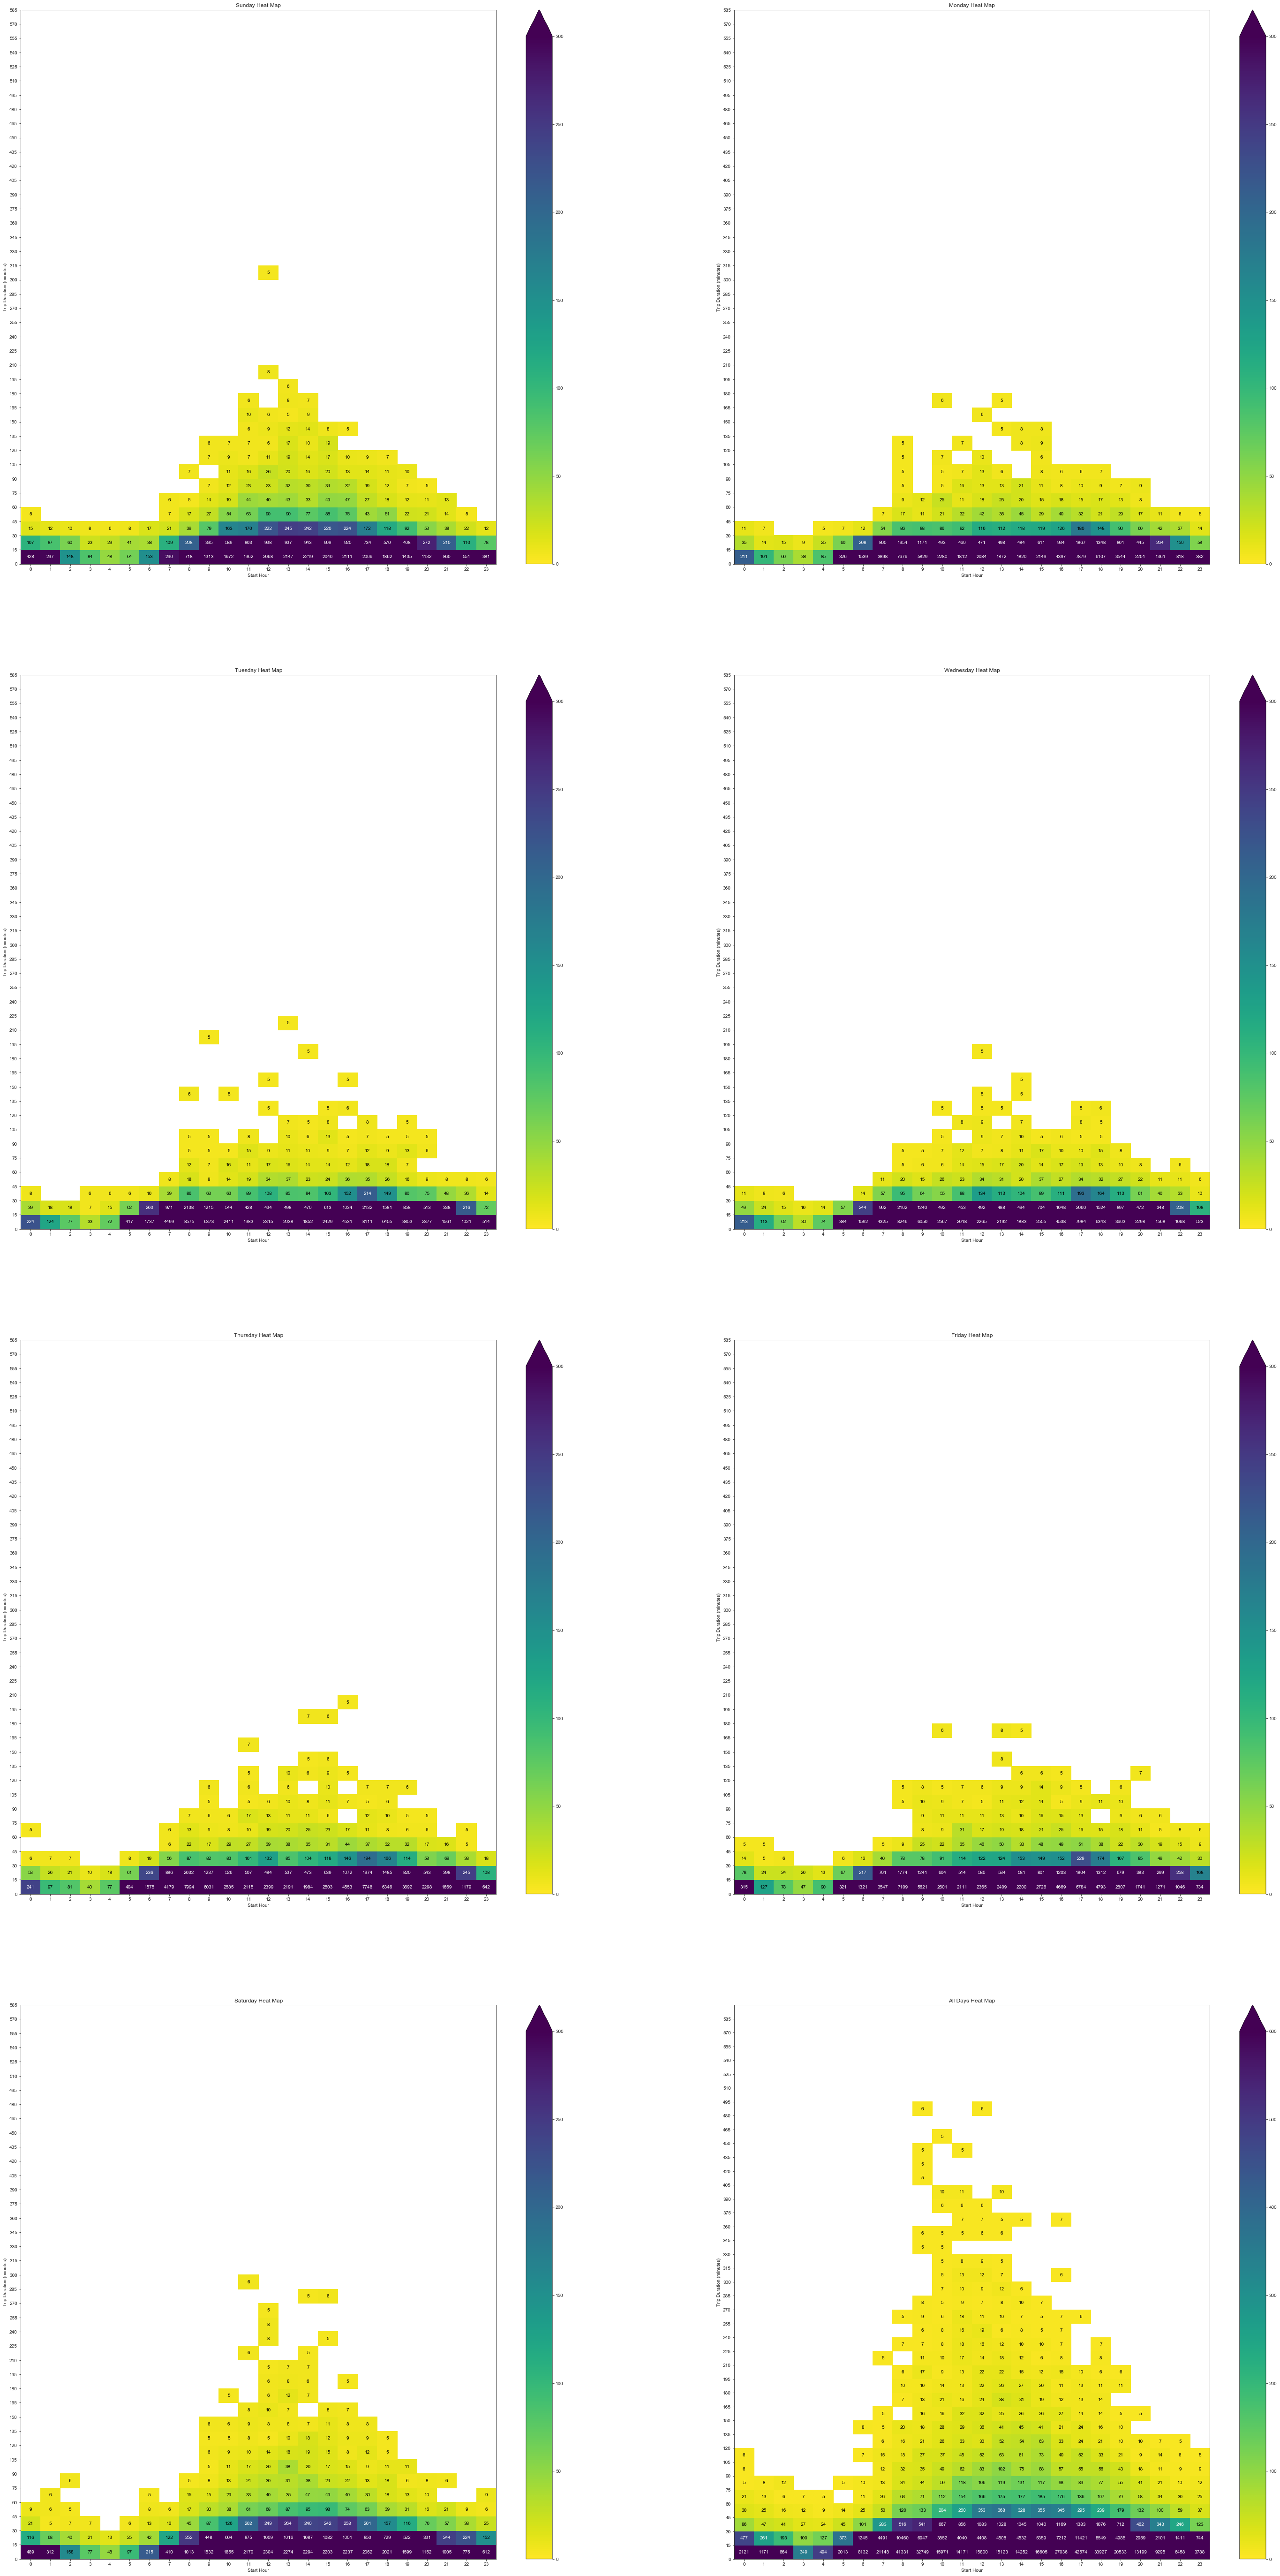

In [286]:
fig = plt.figure(figsize = [50,100]) # larger figure size for subplots

fig.subplots(4,2)

plt.subplot(4,2,1)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Sun'],title = 'Sunday Heat Map');

plt.subplot(4,2,2)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Mon'], title = 'Monday Heat Map');

plt.subplot(4,2,3)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Tue'], title = 'Tuesday Heat Map');

plt.subplot(4,2,4)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Wed'], title = 'Wednesday Heat Map');

plt.subplot(4,2,5)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Thu'], title = 'Thursday Heat Map');

plt.subplot(4,2,6)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Fri'], title = 'Friday Heat Map');

plt.subplot(4,2,7)

heatplot(tripsamp_df[tripsamp_df.start_weekday == 'Sat'], title = 'Saturday Heat Map');

plt.subplot(4,2,8)

heatplot(tripsamp_df, title = 'All Days Heat Map', ylim=600, vmax=600, cmax=100000);

Use "jupyter nbconvert presentation.ipynb --to slides --template ../output-toggle.tpl
--post serve" to convert to presentation.